In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

(1024, 1024)


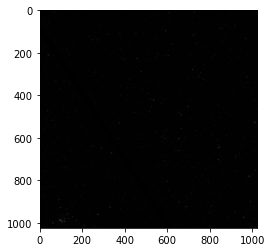

In [6]:
# Load im
im_path = '../running_data/npy_dataset/val_raw_21/images/hst_14610_51_acs_wfc_f814w_jdb651_drc_22.npy'
im = np.load(im_path)

# Clean
im[im < 0] = 0.0
im = np.nan_to_num(im, nan=0.0, posinf=0.0, neginf=0.0)
im = np.clip(im, 0.0, 255.0)
print(im.shape)
# im = im.reshape((1, 1, 1024, 1024))
# im = np.ascontiguousarray(im)
# im = torch.from_numpy(im)
# im = im.float()
plt.imshow(im, cmap='gray')

In [3]:
# Apply filter function
def apply_filter(im, fil,): # Apply particular filter to image
    im = np.clip(im, 0.0, 1.0)
    
    filter_name = fil
    if filter_name == "Linear":
        im = im
    elif filter_name == "Log":
        e = np.exp(-10 * im)
        im = (e - 1) / (np.exp(-10) - 1)
    elif filter_name == "Power":
        im = (np.power(1000, im) - 1) / 1000.0
    elif filter_name == "Sqrt":
        im = np.sqrt(im)
    elif filter_name == "Squared":
        im = im**2
    elif filter_name == "ASINH":
        im = (np.arcsinh(10*im)) / 3
    elif filter_name == "SINH":
        im = (np.sinh(3*im)) / 10
    else:
        print("No filter applied")
    
    # im = np.interp(im, (im.min(), im.max()), (0, 1))
    im = np.clip(im, 0.0, 1.0)

    return im

stats = {
    "Linear": [
        0.0,
        0.9538455441441556
    ],
    "Log": [
        0.0,
        1.0
    ],
    "Power": [
        0.0,
        0.021504631274158185
    ],
    "Sqrt": [
        0.0,
        1.0
    ],
    "Squared": [
        0.0,
        0.2685944153893656
    ],
    "ASINH": [
        0.0,
        0.9994076500993233
    ],
    "SINH": [
        0.0,
        0.32274698918936634
    ]
}


# Scale data
def scale_data(im, fil):
    vmin, vmax = stats[fil]
    
    im = np.subtract(im, float(vmin))
    
    if (vmax - vmin) != 0:
        im = np.true_divide(im, vmax-vmin)
    else:
        raise ZeroDivisionError
    
    im = np.clip(im, 0.0, 1.0)
    
    return im

def get_data(im, fil):
    im = apply_filter(im, fil)
    im = scale_data(im, fil)
    return im

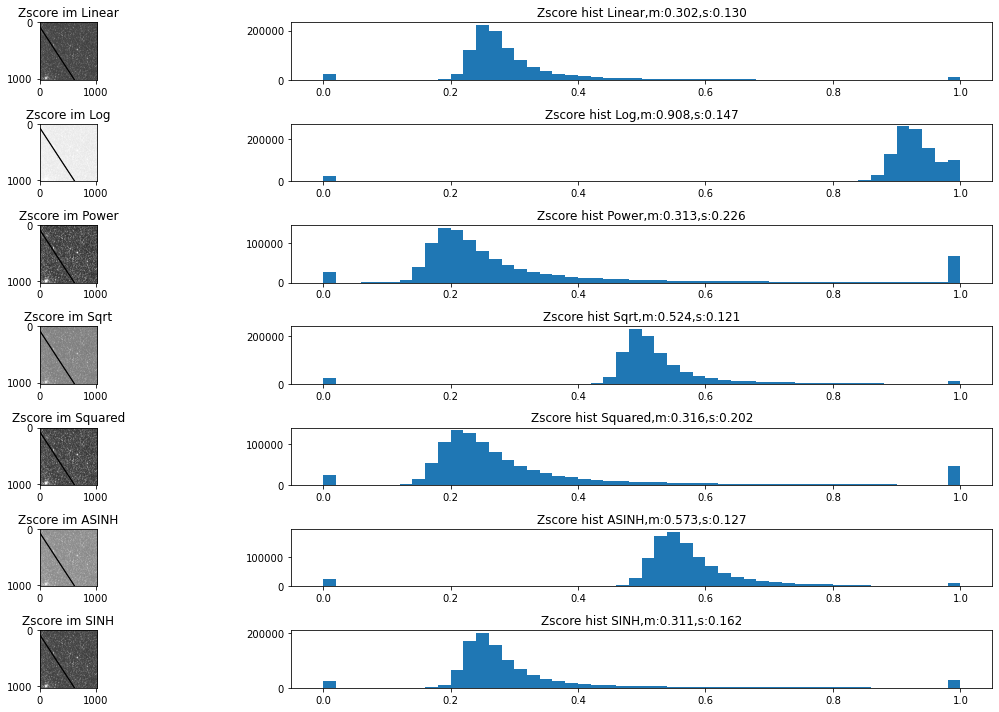

In [4]:
fig, axes = plt.subplots(7, 2, figsize=(18, 10))
filters = ["Linear", "Log", "Power", "Sqrt", "Squared", "ASINH", "SINH"]

for idx in range(axes.flatten().shape[0]):
    
    row_idx = idx // 2
    col_idx = idx % 2
    cur_filter = deepcopy(filters[row_idx])

    if col_idx == 0:
        cur_im = get_data(deepcopy(im), cur_filter)
    elif col_idx == 1:
        cur_im = get_data(deepcopy(im), cur_filter)
    
    if col_idx == 1:
        axes[row_idx, col_idx].hist(cur_im.ravel(), bins=50)
        axes[row_idx, col_idx].set_title(f'Zscore hist {cur_filter},m:{cur_im.mean():.3f},s:{cur_im.std():.3f}')
    
    elif col_idx == 0:
        axes[row_idx, col_idx].imshow(cur_im, cmap='gray')
        axes[row_idx, col_idx].set_title(f'Zscore im {cur_filter}')

plt.tight_layout()
plt.show()


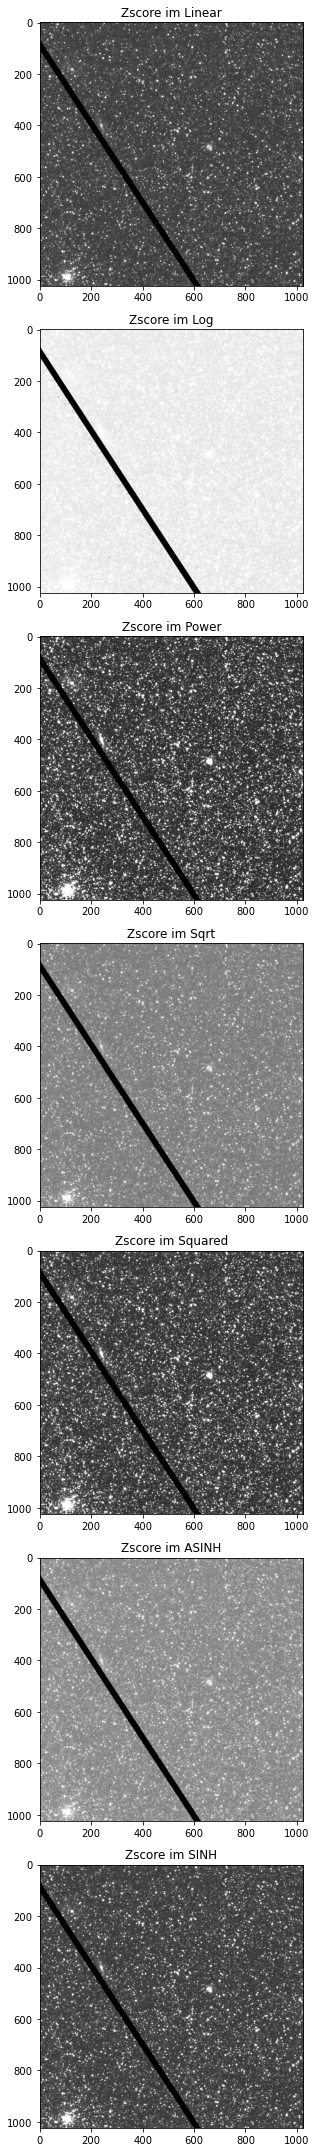

In [5]:
fig, axes = plt.subplots(7, 1, figsize=(18, 30))
filters = ["Linear", "Log", "Power", "Sqrt", "Squared", "ASINH", "SINH"]

for idx in range(axes.flatten().shape[0]):
    
    cur_filter = deepcopy(filters[idx])
    cur_im = get_data(deepcopy(im), cur_filter)
    
    axes[idx].imshow(cur_im, cmap='gray')
    axes[idx].set_title(f'Zscore im {cur_filter}')

plt.tight_layout()
plt.show()